In [12]:
from openparticle import *
from openparticle.utils import get_matrix_element, generate_matrix, overlap
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 270

# Static Yukawa

$$
H = C_f b^\dagger b + C_b a^\dagger a + g b^\dagger b(a + a^\dagger)
$$

$$
H(t) = [C_f + g^2(1 - e^{-2C_b^2t})/C_b]b^\dagger b + C_b a^\dagger a + ge^{-2C_bt} b^\dagger (a^\dagger + a)b
$$

In [7]:
Cf, Cb, g0 = 1, 1, 10
N = 125
n = 3

In [8]:
def g(t):
    return g0 * np.exp(-Cb**2 * t)

def Delta(t):
    return (1 - np.exp(2 * Cb**2 * t)) * Cb**2

In [9]:
def H(t):
    return (
        (Cf + g(t)**2 * Delta(t)) * ParticleOperator('b0^ b0')
        + Cb * ParticleOperator('a0^ a0') 
        + g(t) * (ParticleOperator('b0^') * (
            ParticleOperator('a0^') + ParticleOperator('a0')
        )*ParticleOperator('b0') )
    )

In [10]:
def get_basis(N):
    return [
        Fock([0], [], [(0, i)]) for i in range(0, N + 1)
        ]


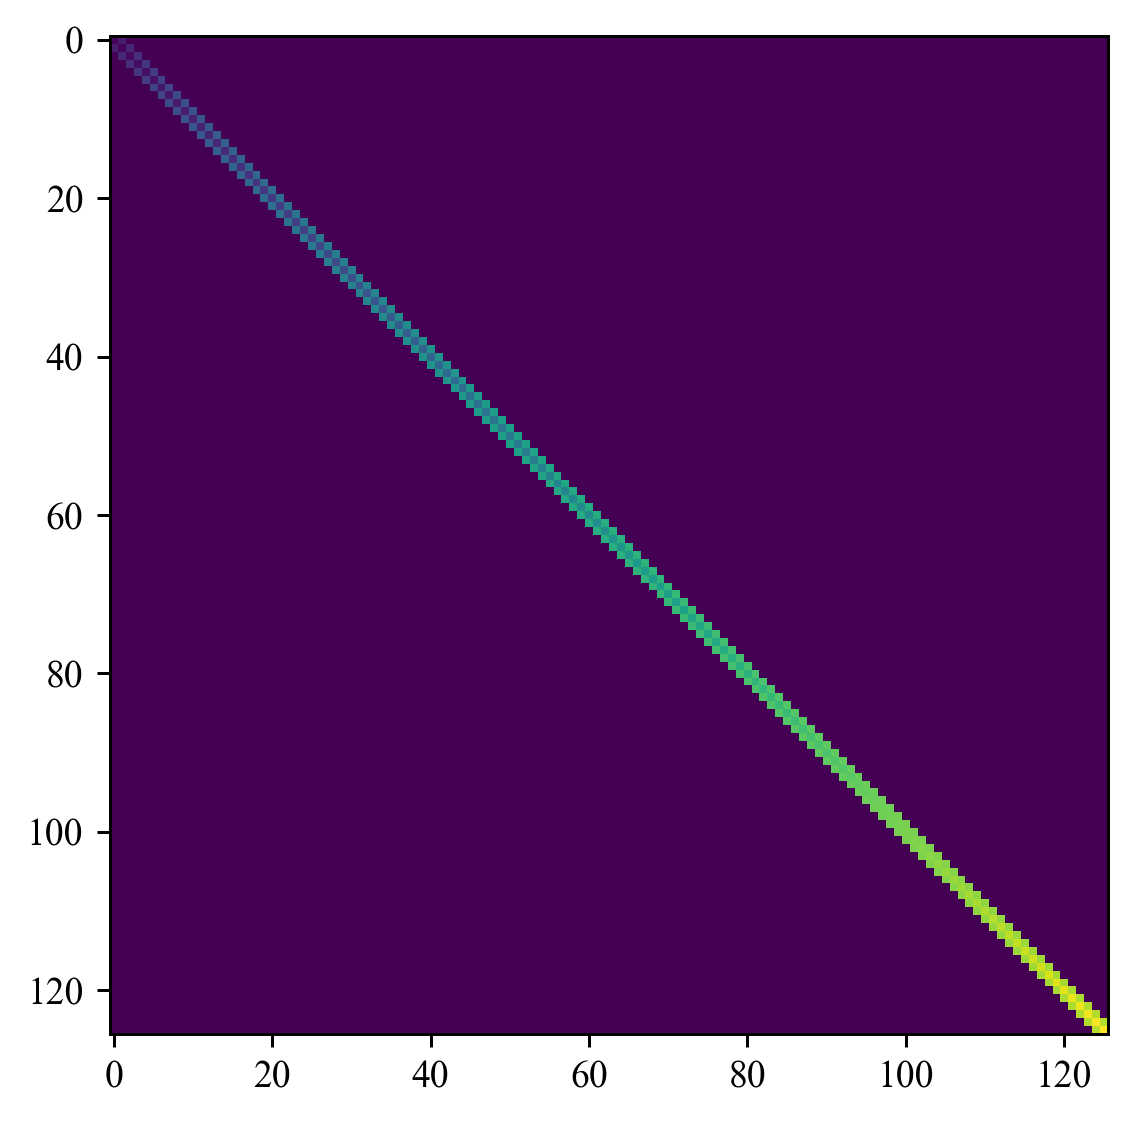

In [13]:
plt.imshow(
    np.real(
        generate_matrix(H(0), get_basis(N))
    )
)

In [14]:
def Heff(t, n):
    return generate_matrix(H(t), get_basis(n))


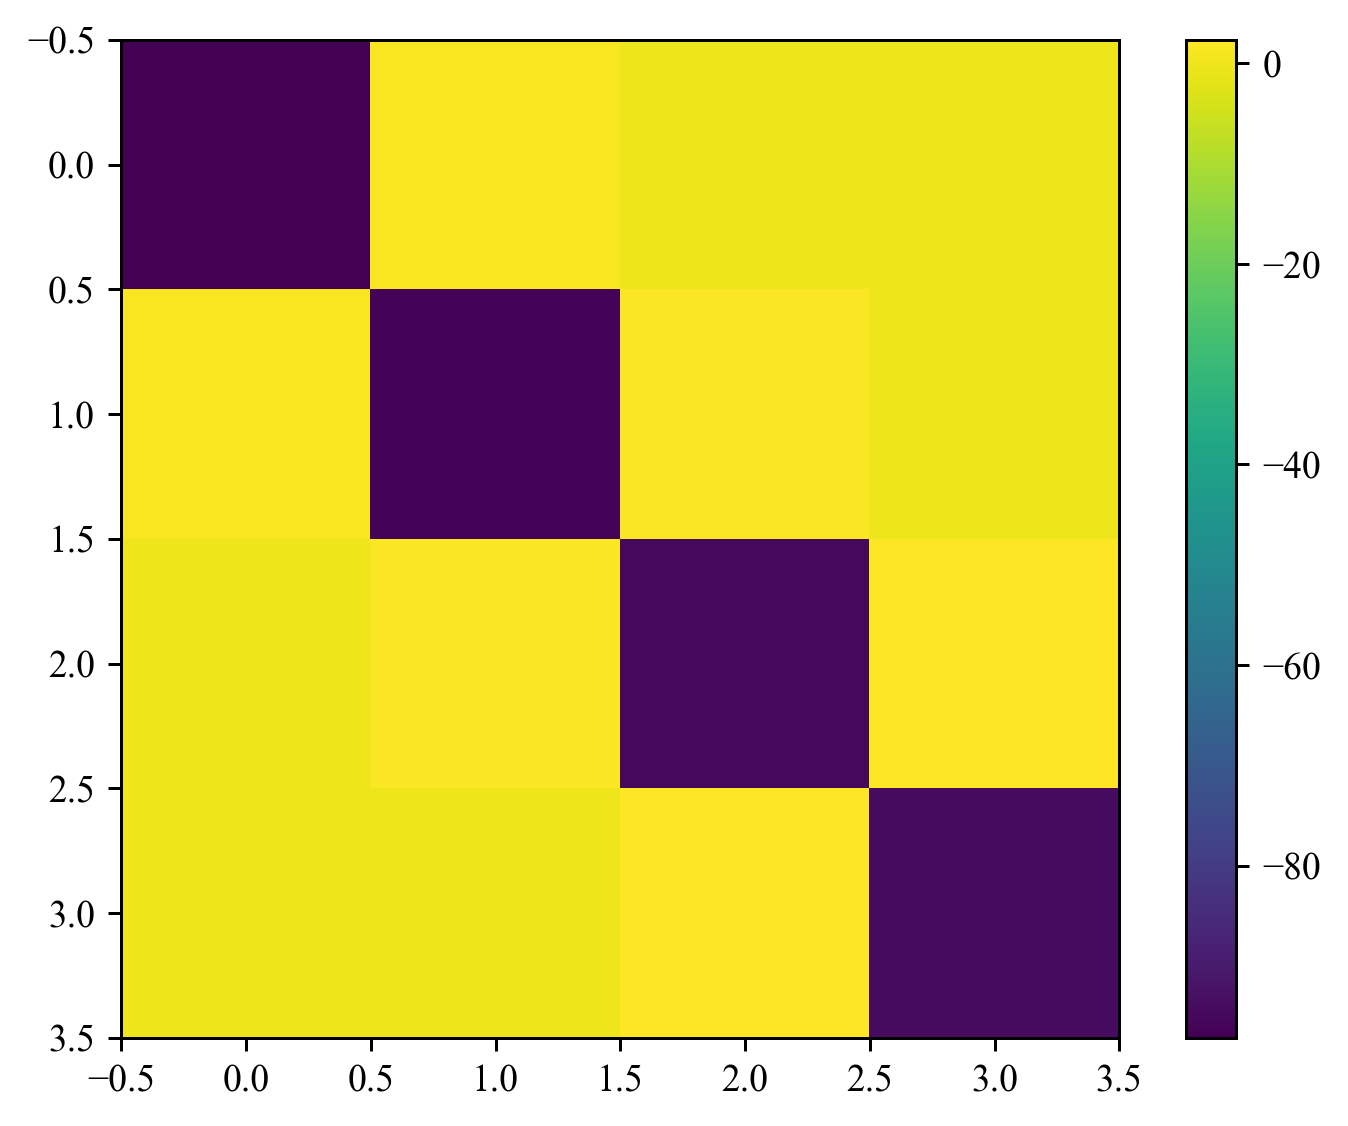

In [20]:
plt.imshow(
    np.real(Heff(2, n))
)
plt.colorbar()

In [19]:
full_vals = np.linalg.eigvalsh(generate_matrix(H(0), get_basis(N)))
eff_vals = np.linalg.eigvalsh(Heff(2, n))

print("E0_full:", min(full_vals))
print("E0_eff:", min(eff_vals))

E0_full: -98.96443372348442
E0_eff: -98.79557300509339


In [23]:
eff_H = H(2)
eff_H

-97.1684361111266 * b0^ b0
1.0 * a0^ a0
1.353352832366127 * b0^ a0^ b0
1.353352832366127 * b0^ a0 b0

In [26]:
vals, vecs = np.linalg.eigh(Heff(2, n))
vals[0], vecs[:, 0]

(-98.79557300509337,
 array([-0.52973793+0.j,  0.63690422+0.j, -0.49965896+0.j,  0.25312381+0.j]))